In [1]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Import the Height Weight Dataset 
data = pd.read_csv('C:\\Users\\ashik\\Downloads\\Compressed\\Height_Weight_Dataset.csv') 
data.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [2]:
#Store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values 
y = data.iloc[:, 1].values 

In [3]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### However, as you can see, the train_test_split shuffled our data, so it is no longer sorted. Matplotlib will plot the points in the order it receives them, so if we feed it our arrays as they are now, we’ll get some pretty weird results. To reorder the arrays, we sort y_train by x_train’s indices, and sort x_train itself

In [4]:
y_train = y_train[X_train[:,0].argsort()]
X_train = X_train[X_train[:, 0].argsort()]

In [5]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

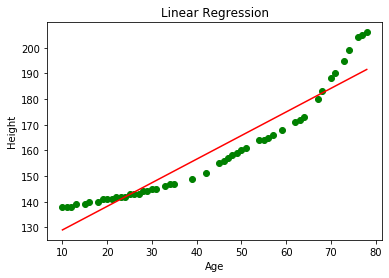

In [6]:
# Visualise the Linear Regression Result
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_train, LinReg.predict(X_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Age') 
plt.ylabel('Height') 
  
plt.show() 

In [7]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
  
X_polynom

array([[1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 2.600e+01, 6.760e+02],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.100e+01, 9.610e+02],
       [1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 3.900e+01, 1.52

In [8]:
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

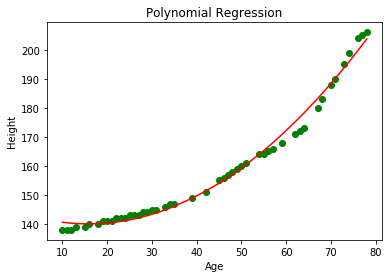

In [9]:
# Visualise the Polynomial Regression Results 
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Age') 
plt.ylabel('Height') 
  
plt.show() 

In [10]:
#Predicted Height from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinReg.predict(X_test)

#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:', r_square)

R-Square Error associated with Simple Linear Regression: 0.8727873738671588


In [11]:
#Predicted Height from test dataset w.r.t Polynomial Regression
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

#Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.989251171098352


In [12]:
# Predicting Height based on Age using Linear Regression 
LinReg.predict([[53]]) 

array([168.52966207])

In [13]:
# Predicting Height based on Age using Polynomial Regression 
PolyReg.predict(polynom.fit_transform([[53]])) 

array([162.81769144])

In [14]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_predict_pr))

4.787426234502788
